In [5]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from scipy import special
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from itertools import combinations as combs
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [6]:
def normalize_arr(arr):
    mean = np.nanmean(arr)
    std = np.nanstd(arr)
    nrm = (arr-mean)/std
    return nrm
    
def yearly_avg_over_months(arr):
    n_yr = np.unique(arr[:,0])
    avg_val = np.zeros(len(n_yr))
    for i in range(len(n_yr)-1):
        avg_val[i] = np.nanmean(arr[i*12:(i+1)*12,2])
    return np.stack((n_yr,avg_val),axis = 1)

def arr_loc(arr,val):
    index = 0
    for i in range(len(arr)):
        index = i
        if int(arr[i]) == int(val):
            break
           
    return index

Processing recreational catch data

In [7]:
RC_catch_file = pd.ExcelFile('Pred_env_Data/Recreational reported fishery catch 1953-2012.xlsx')

In [35]:
rc_sheet_name = RC_catch_file.sheet_names
print(rc_sheet_name)

rc_data = RC_catch_file.parse('jira1580')

['jira1580']


In [45]:
chinook_data = rc_data.loc[rc_data['SPECIES_DESC'] == 'CHINOOK SALMON']
coho_data = rc_data.loc[rc_data['SPECIES_DESC'] == 'COHO SALMON']

#Selecting data in the interval of 1990-2010
chinook_data_cleaned = chinook_data.loc[(chinook_data['YEAR'] >= 1990) & (chinook_data['YEAR'] <=2010)]
coho_data_cleaned = coho_data.loc[(coho_data['YEAR'] >= 1990) & (coho_data['YEAR'] <=2010)]

chinook_file_name = './Pred_env_data/Chinook_recreational_catch_SOG_1990_2010.xlsx'
coho_file_name = './Pred_env_data/Coho_recreational_catch_SOG_1990_2010.xlsx'

chinook_data_cleaned.to_excel(chinook_file_name)
coho_data_cleaned.to_excel(coho_file_name)

In [56]:
#print(chinook_data_cleaned)

In [57]:
RC_chinook_file = pd.read_excel('Pred_env_data/Chinook_recreational_catch_SOG_1990_2010.xlsx')
RC_coho_file = pd.read_excel('Pred_env_data/Coho_recreational_catch_SOG_1990_2010.xlsx')

rc_catch_yr = np.arange(1990,2011,1,dtype = int)
rc_chinook = np.zeros(len(rc_catch_yr))
rc_coho = np.zeros(len(rc_catch_yr))

#print(rc_catch_yr)

In [48]:
for i in range(len(rc_catch_yr)):
    r_ck = RC_chinook_file.loc[RC_chinook_file['YEAR'] == rc_catch_yr[i]]     
    r_co = RC_coho_file.loc[RC_coho_file['YEAR'] == rc_catch_yr[i]]
    rc_chinook[i] = r_ck['PIECES'].sum()
    rc_coho[i] = r_co['PIECES'].sum()

Data_features = np.stack((rc_chinook,rc_coho),axis = 1)
scaler = StandardScaler()
Data_features_nrm = scaler.fit_transform(Data_features)

Processing salmon viability data

In [49]:

zooplankton_file = pd.ExcelFile('Data/ZooPlanktonPerryData.xlsx')
zp_sheet_name = zooplankton_file.sheet_names
Salmon_viability = zooplankton_file.parse('5. Salmon marine survivals')
Salmon_data_arr = Salmon_viability.to_numpy()
start_ind_viab = arr_loc(Salmon_data_arr[:,0],1990)
end_ind_viab = arr_loc(Salmon_data_arr[:,0],2010)
Salmon_viab_yr = Salmon_data_arr[start_ind_viab:end_ind_viab+1,0]
Salmon_viab = Salmon_data_arr[start_ind_viab:end_ind_viab+1,1:]
Salmon_viab_logit = special.logit(Salmon_viab)
Salmon_viab_nrm = (Salmon_viab_logit-np.nanmean(Salmon_viab_logit,axis = 0))/np.nanstd(Salmon_viab_logit,axis = 0)

# Plotting Salmon viability vs recreational catches

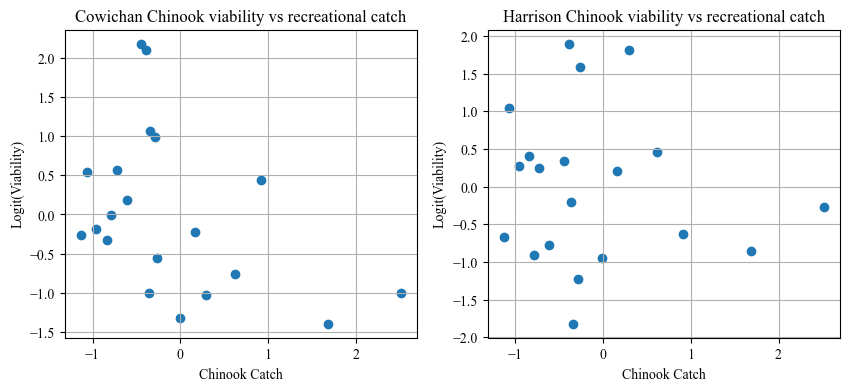

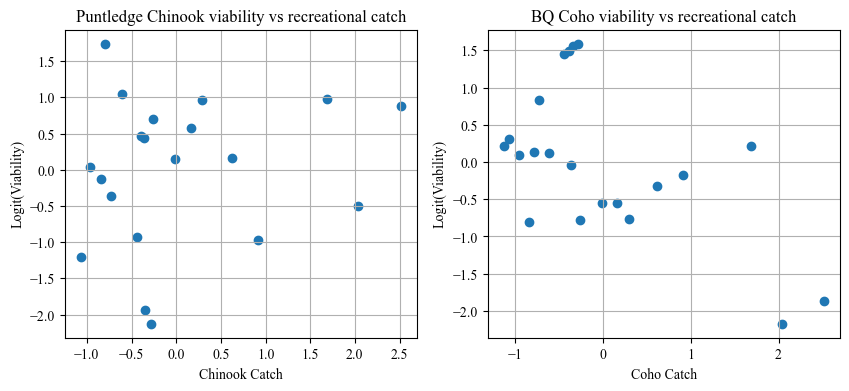

In [55]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,4))
ax1.set_title("Cowichan Chinook viability vs recreational catch")
ax1.scatter(Data_features_nrm[:,0],Salmon_viab_nrm[:,0])
ax1.set_xlabel("Chinook Catch")
ax1.set_ylabel("Logit(Viability)")
ax1.grid()

ax2.set_title("Harrison Chinook viability vs recreational catch")
ax2.scatter(Data_features_nrm[:,0],Salmon_viab_nrm[:,1])
ax2.set_xlabel("Chinook Catch")
ax2.set_ylabel("Logit(Viability)")
ax2.grid()

fig, (ax3,ax4) = plt.subplots(1,2,figsize = (10,4))
ax3.set_title("Puntledge Chinook viability vs recreational catch")
ax3.scatter(Data_features_nrm[:,0],Salmon_viab_nrm[:,2])
ax3.set_xlabel("Chinook Catch")
ax3.set_ylabel("Logit(Viability)")
ax3.grid()

ax4.set_title("BQ Coho viability vs recreational catch")
ax4.scatter(Data_features_nrm[:,0],Salmon_viab_nrm[:,3])
ax4.set_xlabel("Coho Catch")
ax4.set_ylabel("Logit(Viability)")
ax4.grid()